In [1]:
import scipy.io
import numpy as np

data = scipy.io.loadmat("/home/data/MAFA/MAFA-Label-Train/LabelTrainAll.mat")

print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Oct 02 03:29:06 2017', '__version__': '1.0', '__globals__': [], 'label_train': array([[(array(['add_1.jpg'], dtype='<U9'), array(['train_00000001.jpg'], dtype='<U18'), array([[ 95, 160,  91,  91, 113, 177, 158, 172,   7,  26,  82,  89,   1,
          3,   1,   1,   3,  -1,  -1,  -1,  -1]], dtype=int16)),
        (array(['add_10.jpg'], dtype='<U10'), array(['train_00000002.jpg'], dtype='<U18'), array([[107,  82,  66,  66, 129,  95, 156,  96,   5,  17,  65,  56,   2,
          3,   1,   1,   3,  -1,  -1,  -1,  -1]], dtype=int16)),
        (array(['add_11.jpg'], dtype='<U10'), array(['train_00000003.jpg'], dtype='<U18'), array([[ 56, 170, 185, 185, 140, 198, 196, 208,  41,  56, 147, 182,   1,
          3,   1,   1,   4,  -1,  -1,  -1,  -1]], dtype=int16)),
        ...,
        (array(['weibo_997.jpg'], dtype='<U13'), array(['train_00025874.jpg'], dtype='<U18'), array([[14, 28, 83, 83, 33, 51, 72, 56,  4, 53, 80, 87, 

In [4]:
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Oct 02 03:29:06 2017'

In [8]:
data['label_train'].shape

(1, 25876)

In [57]:
data['label_train'][0][0] 

# 95, 160,  91,  91 face bbox x,y,w,h
# (113, 177), (158, 172) two eys
# 7,  26,  82,  89, face occluder bbox xywh

# 1, occ_type 1(simple) 2(complex) 3(human body)

# 3, icc_degree

# 1,  1, gender and race   

# 3, orientation 1-left 2-left frontal 3-front 4=right frontal 5=right  

# -1,  -1,  -1,  -1 xywh bbox of glasses


(array(['add_1.jpg'], dtype='<U9'), array(['train_00000001.jpg'], dtype='<U18'), array([[ 95, 160,  91,  91, 113, 177, 158, 172,   7,  26,  82,  89,   1,
          3,   1,   1,   3,  -1,  -1,  -1,  -1]], dtype=int16))

In [6]:
data['label_train'][0][1975]

(array(['imple_20821.jpg'], dtype='<U15'), array(['train_00001976.jpg'], dtype='<U18'), array([[493, 379, 369, 369, 568, 487, 720, 494,   8, 151, 297, 363,   1,
          3,   1,   2,   3,  -1,  -1,  -1,  -1]], dtype=int16))

(1190, 960, 3)


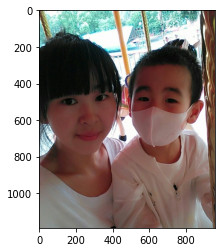

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/home/data/MAFA/images/train_00001976.jpg")
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img)
plt.show()

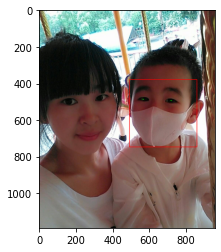

In [10]:
labels = data['label_train'][0][1975][2]


for label in labels:
    f_x1, f_y1, f_w, f_h = label[:4]
    p_x1, p_y1, p_x2, p_y2 = label[4:8]
    m_x1, m_y1, m_w, m_h = label[8:12] # m_x1 m_y1 is relative position of f_x1 f_y1

    cv2.rectangle(img, (f_x1, f_y1, f_w, f_h), (255,0,0), 2)
    cv2.circle(img, (p_x1, p_y1), 1, (0,255,0), 2)
    cv2.circle(img, (p_x2, p_y2), 1, (0,255,0), 2)

plt.imshow(img)
plt.show()


In [20]:
import pandas as pd

df = pd.read_table('mafa.txt', sep=' ',  header = None)
df.columns=['filename', 'x1' , 'y1', 'w', 'h', 'p1_x', 'p1_y', 'p2_x', 'p2_y', 'p3_x', 'p3_y', 'p4_x', 'p4_y', 'p5_x', 'p5_y', '']

In [22]:
df.iloc[:, :-1]

,filename,x1,y1,w,h,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,p5_x,p5_y
0,train_00000001.jpg,95,160,91,91,113,177,158,172,0,0,0,0,0,0
1,train_00000002.jpg,107,82,66,66,129,95,156,96,0,0,0,0,0,0
2,train_00000003.jpg,56,170,185,185,140,198,196,208,0,0,0,0,0,0
3,train_00000004.jpg,162,208,71,71,182,229,203,238,0,0,0,0,0,0
4,train_00000005.jpg,86,69,99,99,134,93,165,98,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29447,train_00025872.jpg,44,4,107,107,67,21,119,20,0,0,0,0,0,0
29448,train_00025873.jpg,31,3,80,80,58,18,90,29,0,0,0,0,0,0
29449,train_00025874.jpg,14,28,83,83,33,51,72,56,0,0,0,0,0,0
29450,train_00025875.jpg,38,4,72,72,60,23,93,21,0,0,0,0,0,0
